# REGRESSORE SVR

In questo notebook, ci occuperemo di costruire un regressore a vettori supporto per il task della ML's Cup. Iniziamo importando le librerie e le classi che ci serviranno nei diversi momenti della nostra costruzione.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, classification_report, mean_squared_error

Innanzitutto creiamo una lista con i nomi delle feature e dei valori obiettivo. A questo punto, ricaviamo per ogni esempio le sue feature e i suoi valori obiettivo dal dataset ML-CUP-TR.csv. In questo modo abbiamo ricavato i dati di training, che dividiamo in X_train (le feature) e in y_train (i valori obiettivo). Dopo aver trasformato i due dataset in due array, standardizzaziamo le feature in X_train attraverso StandardScaler(). 

In [2]:
columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8",
           "x9", "x10", "x11", "x12", "y1", "y2", "y3"]

df = pd.read_csv('ML-CUP24-TR.csv',
                 usecols=[*range(1, 16)],
                 skiprows=[*range(7)],
                 names=columns)

X_train = df.iloc[:, :12]
y_train = df.iloc[:, 12:]

In [3]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Innanzitutto creiamo la funzione mee() che, dati due array, calcola la media della distanza euclidea per tutti i vettori che lo compongono. Questa metrica ci servirà per validare il trainset. Successivamente inizializziamo un Support Vector Regressor che restituisca in output 3 valori (dal momento che questo è quello che il nostro modello è chiamato a fare). 

In [4]:
def mee(y_true, y_pred):
  return np.mean(np.linalg.norm(y_true - y_pred, axis=1))

In [5]:
model = MultiOutputRegressor(SVR())

mee_scorer = make_scorer(mee, greater_is_better=False)

Inoltre, creiamo una funzione che si occupi della visualizzazione (tramite heatmap) dei risultati della grid search sia per la mee, sia per la funzione di errore (nel nostro caso neg_mean_square_error).

In [36]:
def visualize_results(gs, param_grid, C_values='estimator__C', gamma_values='estimator__gamma', loss_metric='mean_test_mse', val_metric='mean_test_mee'):
    
    results = pd.DataFrame(gs.cv_results_)
    
    C_values = param_grid[C_values]
    gamma_values = param_grid[gamma_values]
    
    accuracy_gs = np.array(results[val_metric]).reshape(len(C_values), len(gamma_values))
    hinge_loss_gs = -np.array(results[loss_metric]).reshape(len(C_values), len(gamma_values))
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(accuracy_gs, annot=True, fmt='.3f', xticklabels=gamma_values, yticklabels=C_values, cmap="viridis")
    plt.title("MEE Heatmap")
    plt.xlabel("Gamma")
    plt.ylabel("C")
    
    plt.subplot(1, 2, 2)
    sns.heatmap(hinge_loss_gs, annot=True, fmt='.3f', xticklabels=gamma_values, yticklabels=C_values, cmap="magma")
    plt.title("MSE Heatmap")
    plt.xlabel("Gamma")
    plt.ylabel("C")
    
    plt.tight_layout()
    plt.show()

A questo punto non resta che eseguire la gridsearch. Dopo aver effettuato la gridsearch, plottiamo i risultati in una heatmap per avere una visione intuitiva della variazione delle performance rispetto alla variazione degli iperparametri scelti. 

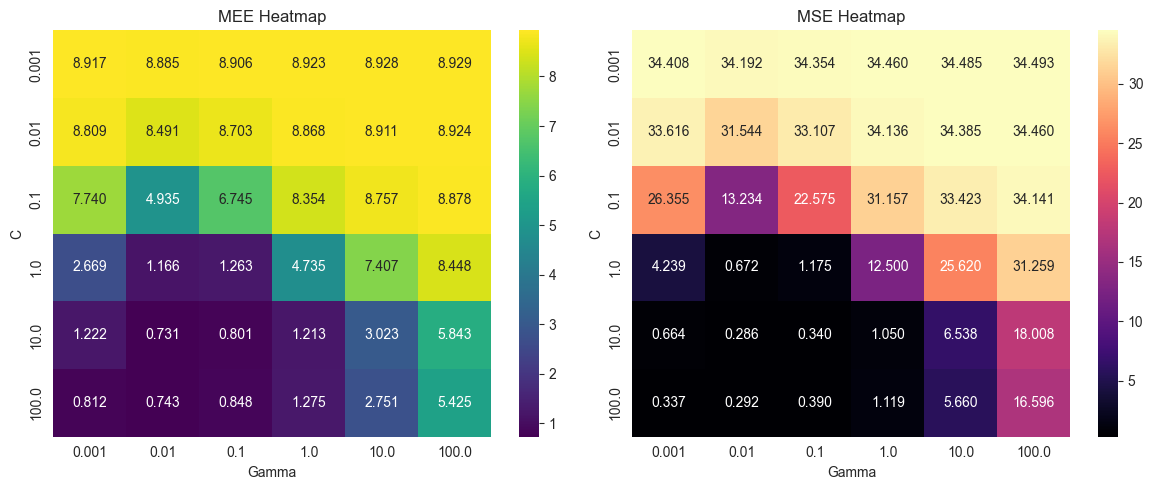

In [7]:
param_range = [0.001, 0.01, 0.1,
               1.0, 10.0, 100.0]

param_grid = {'estimator__C': param_range,
               'estimator__gamma': param_range,
               'estimator__kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee)
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)


GS = grid_search.fit(X_train, y_train)
visualize_results(GS, param_grid)

Esploriamo la sezione che ha portato i risultati più interessanti, e continuiamo fino a che riusciamo a migliorare i risultati.

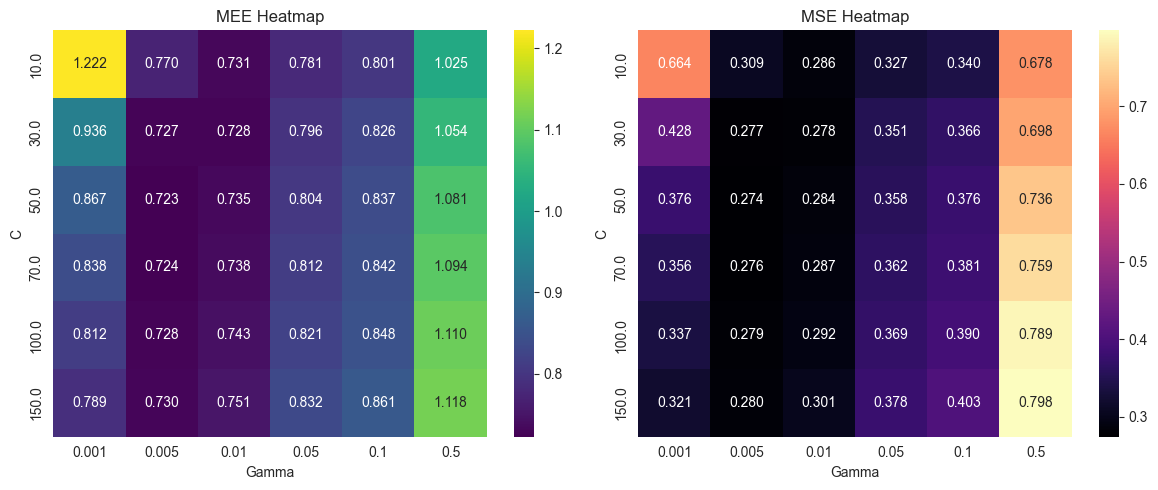

In [10]:
param_range_gamma = [0.001, 0.005, 0.01, 
                     0.05, 0.1, 0.5]

param_range_C = [10.0, 30.0, 50.0, 70.0, 100.0, 150.0]

param_grid = {'estimator__C': param_range_C,
               'estimator__gamma': param_range_gamma,
               'estimator__kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee)
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)


GS = grid_search.fit(X_train, y_train)
visualize_results(GS, param_grid)

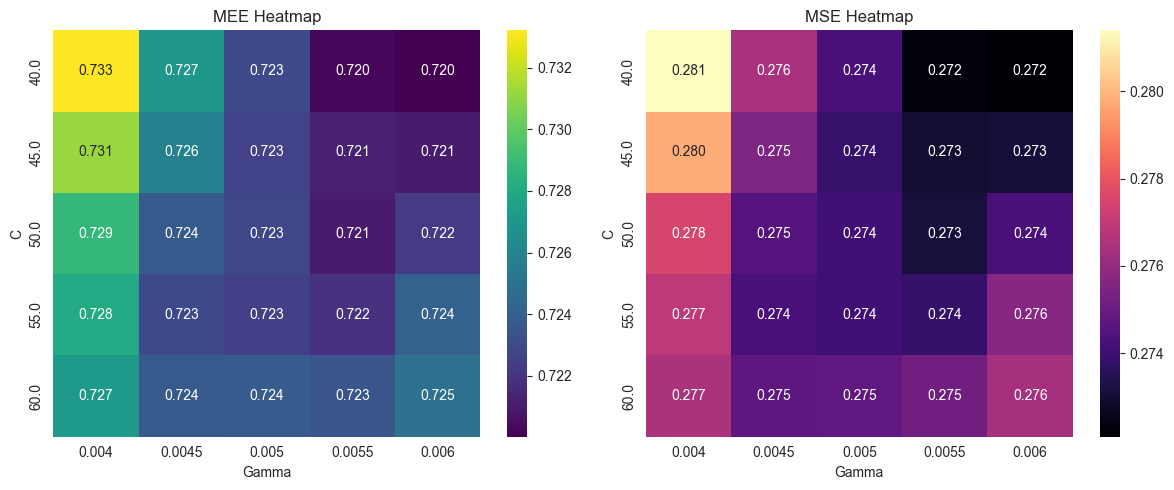

In [11]:
param_range_gamma = [0.004, 0.0045, 0.005, 0.0055, 0.006]

param_range_C = [40.0, 45.0, 50.0, 55.0, 60.0]

param_grid = {'estimator__C': param_range_C,
               'estimator__gamma': param_range_gamma,
               'estimator__kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee)
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)


GS = grid_search.fit(X_train, y_train)
visualize_results(GS, param_grid)

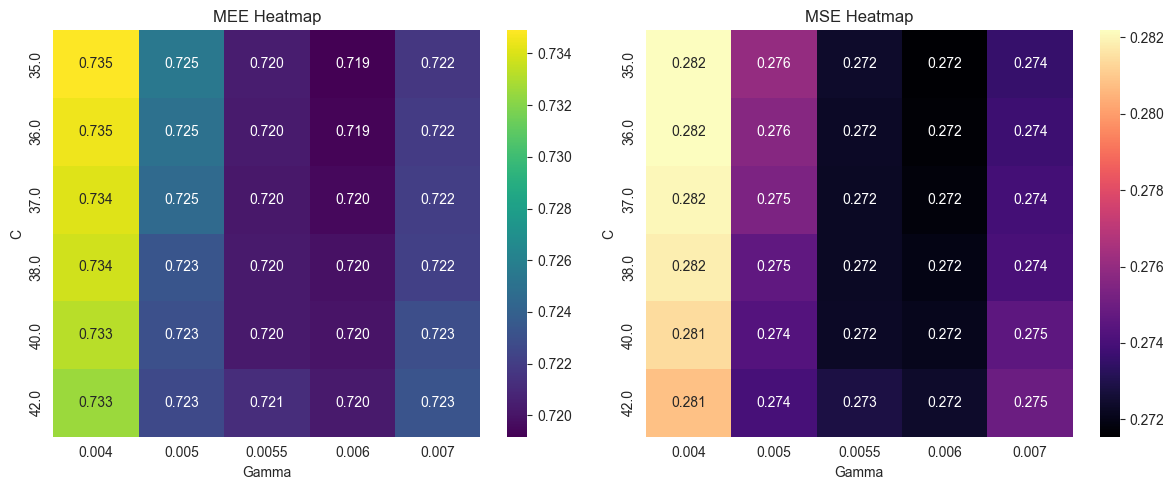

In [13]:
param_range_gamma = [0.004, 0.005, 0.0055, 0.006, 0.007]

param_range_C = [35.0, 36.0, 37.0, 38.0, 40.0, 42.0]

param_grid = {'estimator__C': param_range_C,
               'estimator__gamma': param_range_gamma,
               'estimator__kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee)
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)


GS = grid_search.fit(X_train, y_train)
visualize_results(GS, param_grid)

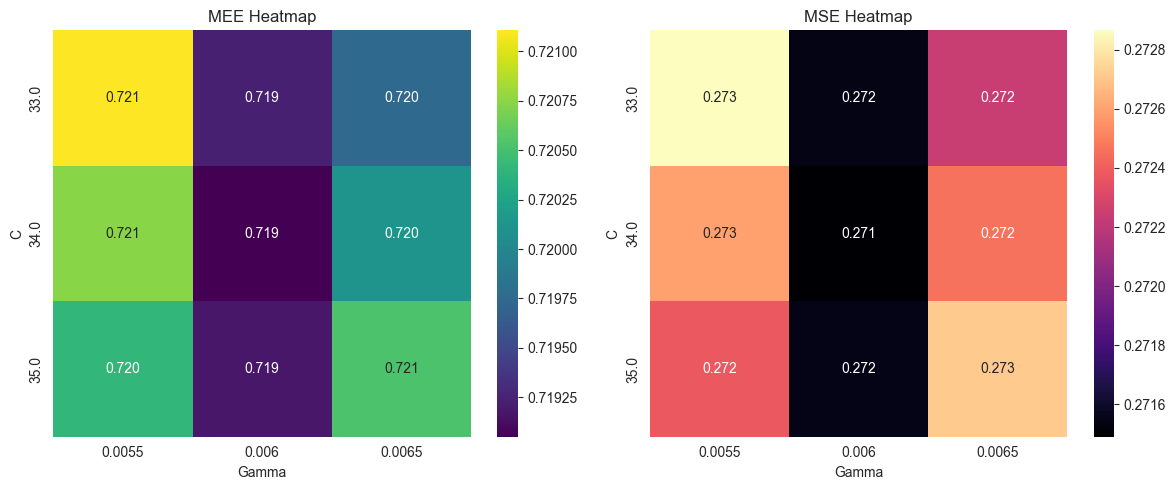

In [14]:
param_range_gamma = [0.0055, 0.006, 0.0065]

param_range_C = [33.0, 34.0, 35.0]

param_grid = {'estimator__C': param_range_C,
               'estimator__gamma': param_range_gamma,
               'estimator__kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee)
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)


GS = grid_search.fit(X_train, y_train)
visualize_results(GS, param_grid)

Il modello migliore è quello con C=34.0 e gamma=0.006.

In [17]:
X_test = pd.read_csv('ML-CUP24-TS.csv',
                 usecols=[*range(1, 13)],
                 skiprows=[*range(7)],
                 names=columns[:12])

X_test = X_test.to_numpy()
X_test = scaler.transform(X_test)

In [21]:
SVR_CUP = MultiOutputRegressor(SVR (kernel='rbf', C=34.0, gamma=0.006))

SVR_CUP.fit(X_train, y_train)

test_predictions = SVR_CUP.predict(X_test)

Per provare a vedere le proiezioni nello spazio tridimensionale, ho aggiunto questi grafici. Il tutto è da togliere nella relazione finale. 

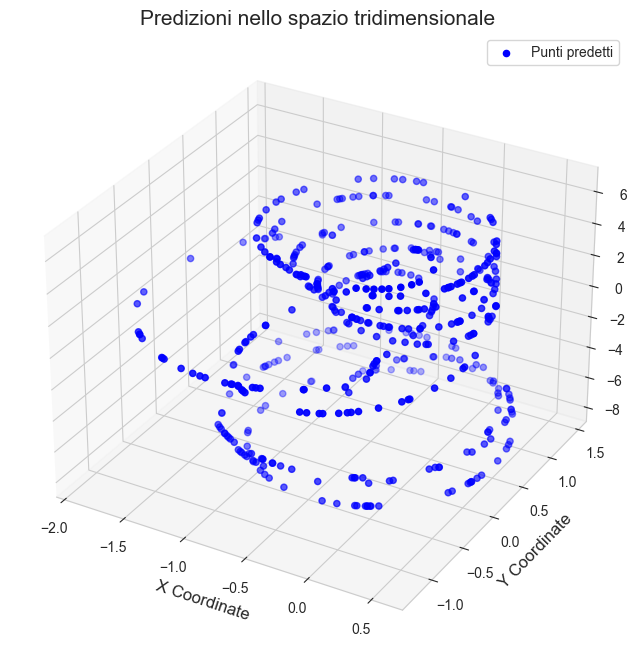

In [28]:
x_coords = test_predictions[:, 0]  
y_coords = test_predictions[:, 1]  
z_coords = test_predictions[:, 2]  

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o', label='Punti predetti')
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_zlabel('Z Coordinate', fontsize=12)
ax.set_title('Predizioni nello spazio tridimensionale del testset', fontsize=15)
ax.legend()

plt.show()

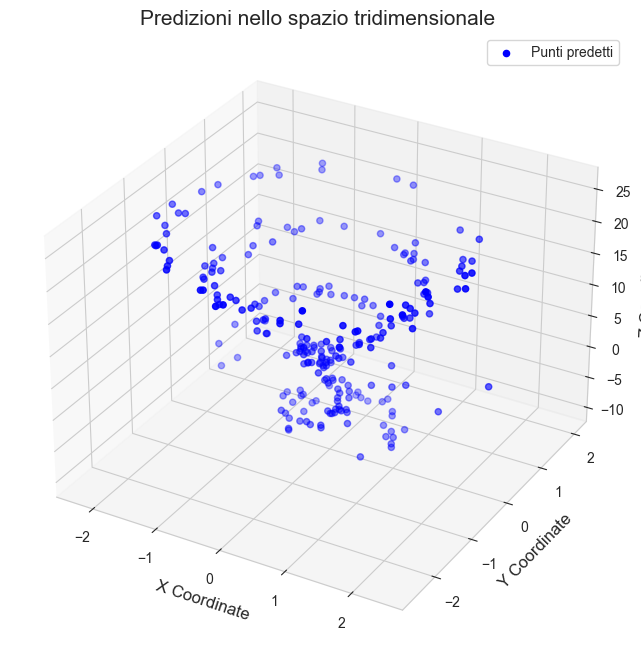

In [29]:
x_coords = y_train[:, 0]  
y_coords = y_train[:, 1]  
z_coords = y_train[:, 2]  

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o', label='Punti predetti')
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_zlabel('Z Coordinate', fontsize=12)
ax.set_title('Predizioni nello spazio tridimensionale del trainset', fontsize=15)
ax.legend()

plt.show()

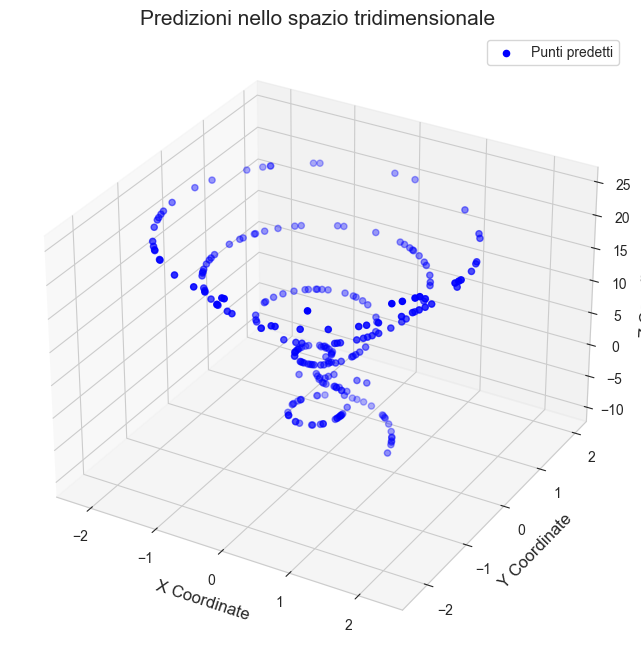

In [30]:
train_predictions = SVR_CUP.predict(X_train)

x_coords = train_predictions[:, 0]  
y_coords = train_predictions[:, 1]  
z_coords = train_predictions[:, 2]  

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o', label='Punti predetti')
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_zlabel('Z Coordinate', fontsize=12)
ax.set_title('Predizioni nello spazio tridimensionale sul trainset', fontsize=15)
ax.legend()

plt.show()

In [31]:
mee(train_predictions, y_train)

0.6622016654227703

# UN MODELLO PER OGNI Y

Provo qui a creare 3 modelli indipendenti per ciascuna y. 

In [34]:
y_train_1 = df.iloc[:, 12]
y_train_2 = df.iloc[:, 13]
y_train_3 = df.iloc[:, 14]

(250,)
(250,)
(250,)


## Addestramento per y1

La gridsearch per il singolo modello è identica a quanto fatta prima. Tuttavia, avendo stavolta solo 1 output, non serve utilizzare il wrapper MultiOutputRegressor. Il codice è quindi adattato di conseguenza. Prima di tutto, però, creo una funzione per calcolarmi il Mean Euclidean Error con vettori a 1 dimensione (che equivale alla media tra le differenze sotto valore assoluto).

In [45]:
def mee_1d(y_true, y_pred):
    return np.mean(np.abs(y_true-y_pred))

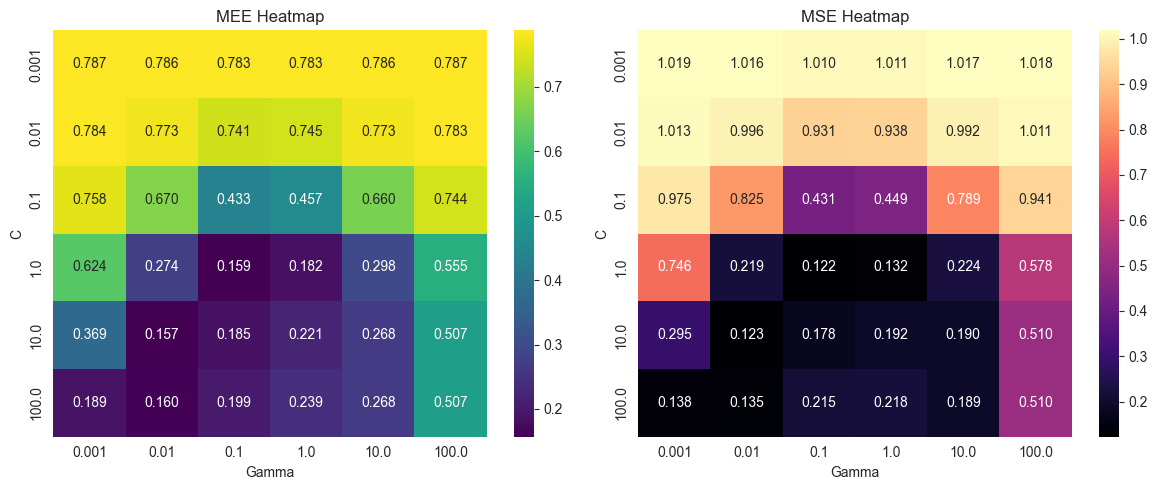

In [47]:
param_range = [0.001, 0.01, 0.1,
               1.0, 10.0, 100.0]

param_grid = {'C': param_range,
               'gamma': param_range,
               'kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee_1d)
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)

GS_y1 = grid_search.fit(X_train, y_train_1)
visualize_results(GS_y1, param_grid, C_values='C', gamma_values='gamma')

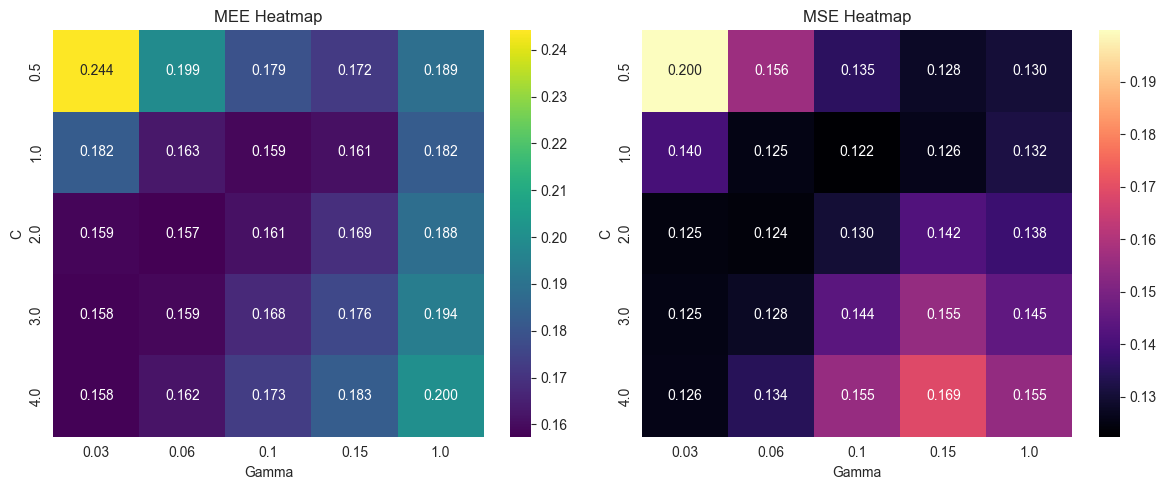

In [49]:
param_range_C = [0.5, 1.0, 2.0, 3.0, 4.0]
param_range_gamma = [0.03, 0.06, 0.1, 0.15, 1.0]

param_grid = {'C': param_range_C,
               'gamma': param_range_gamma,
               'kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee_1d)
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)

GS_y1 = grid_search.fit(X_train, y_train_1)
visualize_results(GS_y1, param_grid, C_values='C', gamma_values='gamma')

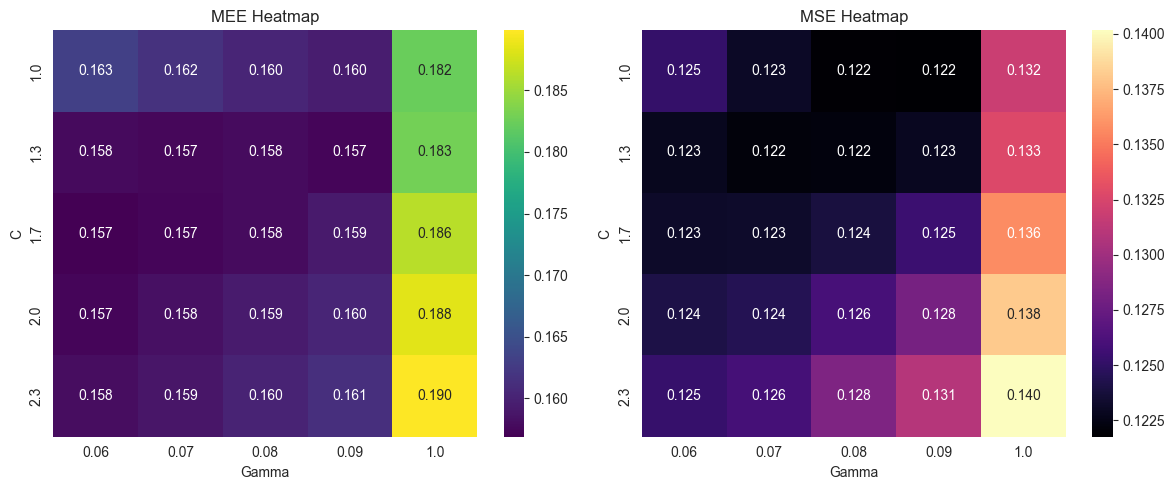

In [50]:
param_range_C = [1.0, 1.3, 1.7, 2.0, 2.3]
param_range_gamma = [0.06, 0.07, 0.08, 0.09, 1.0]

param_grid = {'C': param_range_C,
               'gamma': param_range_gamma,
               'kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee_1d)
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)

GS_y1 = grid_search.fit(X_train, y_train_1)
visualize_results(GS_y1, param_grid, C_values='C', gamma_values='gamma')

Il modello migliore è quello con C=1.3 e gamma=0.07. Quindi lo addestriamo e salviamo i risultati in una variabile

In [52]:
SVR_CUP_y1 = SVR(kernel='rbf', C=1.3, gamma=0.07)

SVR_CUP_y1.fit(X_train, y_train_1)

test_predictions_y1 = SVR_CUP_y1.predict(X_test)

## Addestramento per y2

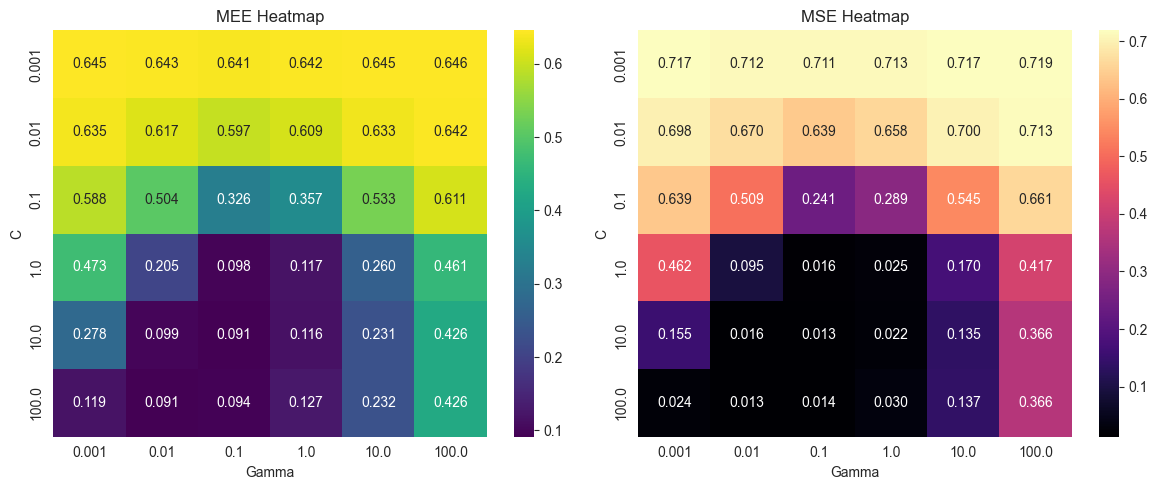

In [54]:
param_range = [0.001, 0.01, 0.1,
               1.0, 10.0, 100.0]

param_grid = {'C': param_range,
               'gamma': param_range,
               'kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee_1d)
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)

GS_y2 = grid_search.fit(X_train, y_train_2)
visualize_results(GS_y2, param_grid, C_values='C', gamma_values='gamma')

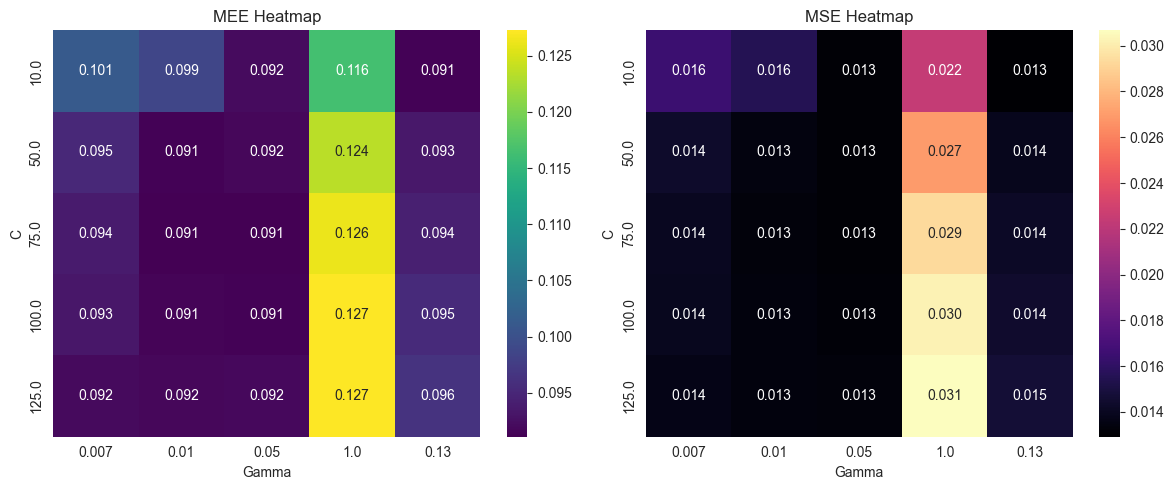

In [55]:
param_range_C = [10.0, 50.0, 75.0, 100.0, 125.0]
param_range_gamma = [0.007, 0.01, 0.05, 1.0, 0.13]

param_grid = {'C': param_range_C,
               'gamma': param_range_gamma,
               'kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee_1d)
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)

GS_y2 = grid_search.fit(X_train, y_train_2)
visualize_results(GS_y2, param_grid, C_values='C', gamma_values='gamma')

Decidiamo che il modello migliore, pur avendo tutti risultati molto simili, è quello con C=75.0 e gamma=0.05

In [56]:
SVR_CUP_y2 = SVR(kernel='rbf', C=75.0, gamma=0.05)

SVR_CUP_y2.fit(X_train, y_train_2)

test_predictions_y2 = SVR_CUP_y2.predict(X_test)

## Addestramento per y3

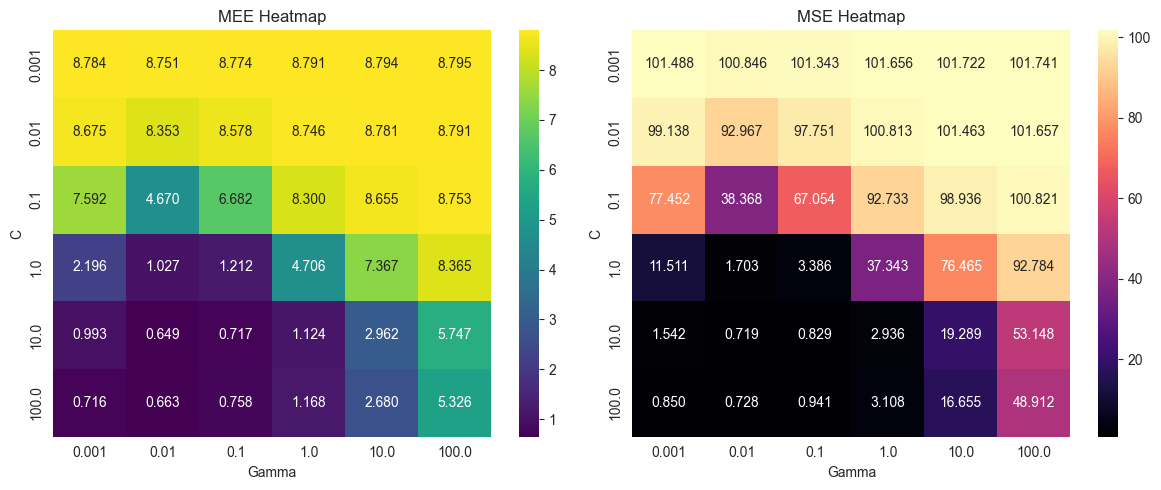

In [57]:
param_range_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_range_gamma = param_range_C

param_grid = {'C': param_range_C,
               'gamma': param_range_gamma,
               'kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee_1d)
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)

GS_y3 = grid_search.fit(X_train, y_train_3)
visualize_results(GS_y3, param_grid, C_values='C', gamma_values='gamma')

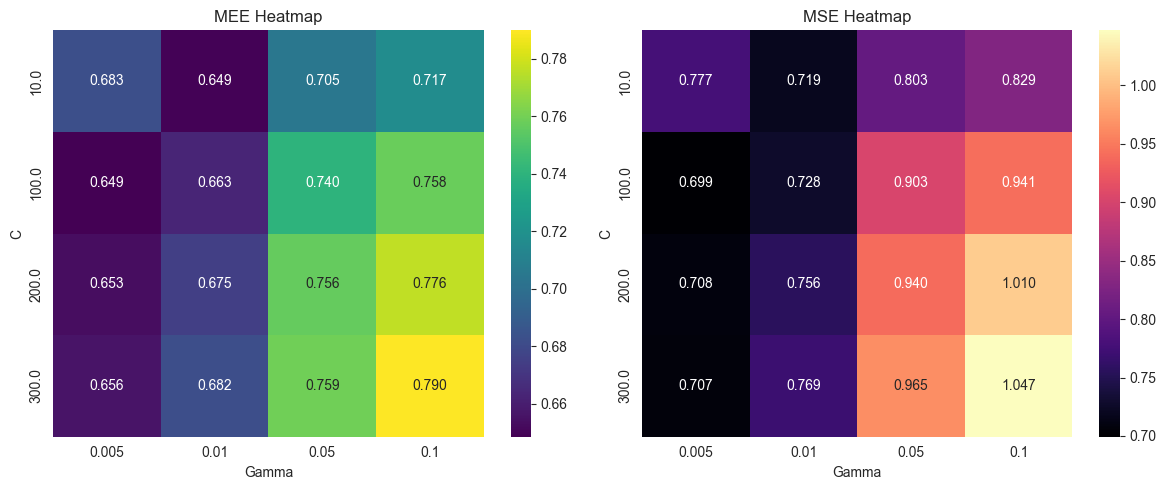

In [58]:
param_range_C = [10.0, 100.0, 200.0, 300.0]
param_range_gamma = [0.005, 0.01, 0.05, 0.1]

param_grid = {'C': param_range_C,
               'gamma': param_range_gamma,
               'kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee_1d)
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)

GS_y3 = grid_search.fit(X_train, y_train_3)
visualize_results(GS_y3, param_grid, C_values='C', gamma_values='gamma')

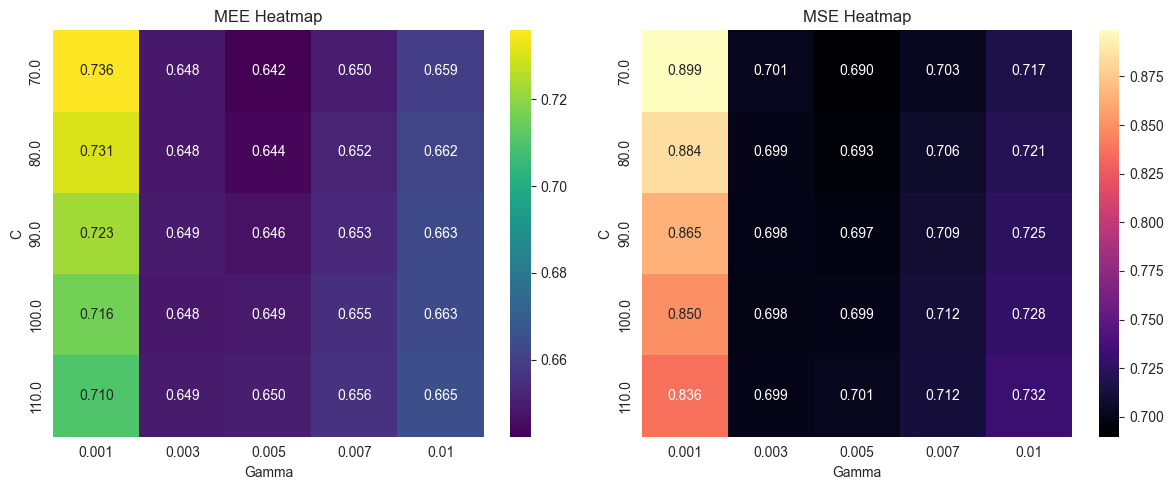

In [59]:
param_range_C = [70.0, 80.0, 90.0, 100.0, 110.0]
param_range_gamma = [0.001, 0.003, 0.005, 0.007, 0.01]

param_grid = {'C': param_range_C,
               'gamma': param_range_gamma,
               'kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee_1d)
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)

GS_y3 = grid_search.fit(X_train, y_train_3)
visualize_results(GS_y3, param_grid, C_values='C', gamma_values='gamma')

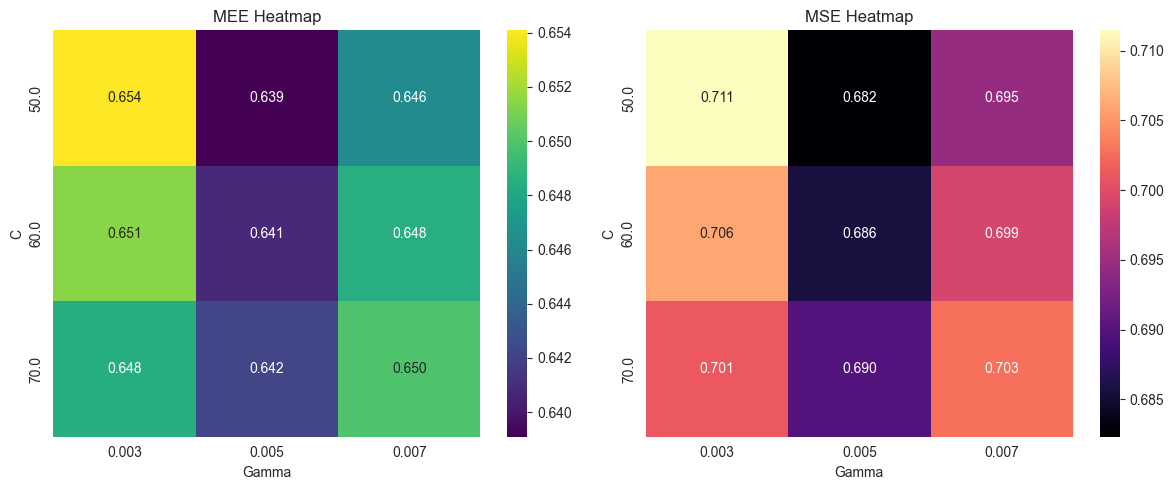

In [60]:
param_range_C = [50.0, 60.0, 70.0]
param_range_gamma = [0.003, 0.005, 0.007]

param_grid = {'C': param_range_C,
               'gamma': param_range_gamma,
               'kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee_1d)
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)

GS_y3 = grid_search.fit(X_train, y_train_3)
visualize_results(GS_y3, param_grid, C_values='C', gamma_values='gamma')

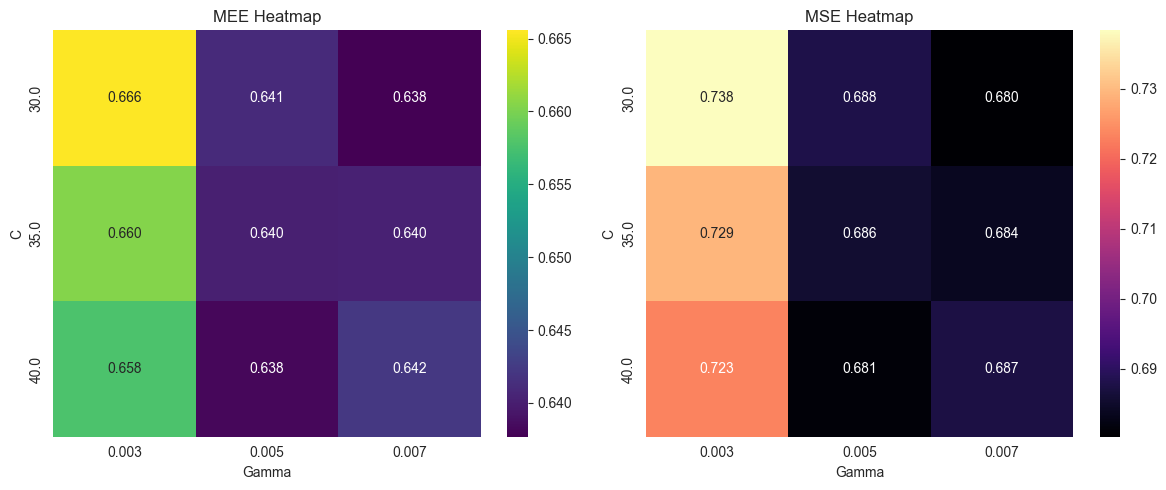

In [62]:
param_range_C = [30.0, 35.0, 40.0]
param_range_gamma = [0.003, 0.005, 0.007]

param_grid = {'C': param_range_C,
               'gamma': param_range_gamma,
               'kernel': ['rbf']}

scoring_svr = {
        'mse' :'neg_mean_squared_error',
        'mee': make_scorer(mee_1d)
}

grid_search = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid,
    scoring=scoring_svr,  
    cv=5,  
    verbose=0,
    n_jobs=-1,
    refit=False
)

GS_y3 = grid_search.fit(X_train, y_train_3)
visualize_results(GS_y3, param_grid, C_values='C', gamma_values='gamma')

Il miglior modello è quello con C=35.0 e gamma=0.005

In [63]:
SVR_CUP_y3 = SVR(kernel='rbf', C=35.0, gamma=0.005)

SVR_CUP_y3.fit(X_train, y_train_3)

test_predictions_y3 = SVR_CUP_y3.predict(X_test)

## Predizioni finali

Ora che abbiamo addestrato i 3 modelli, e abbiamo anche ricavato le loro predizioni sul testset, vediamo come rappresentano la figura

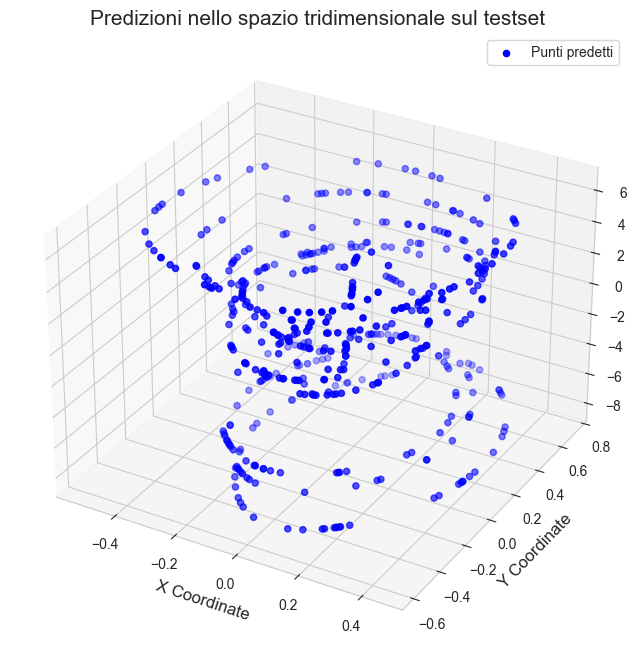

In [73]:
x_coords = test_predictions_y1
y_coords = test_predictions_y2
z_coords = test_predictions_y3 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o', label='Punti predetti')
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_zlabel('Z Coordinate', fontsize=12)
ax.set_title('Predizioni nello spazio tridimensionale sul testset', fontsize=15)
ax.legend()

plt.show()

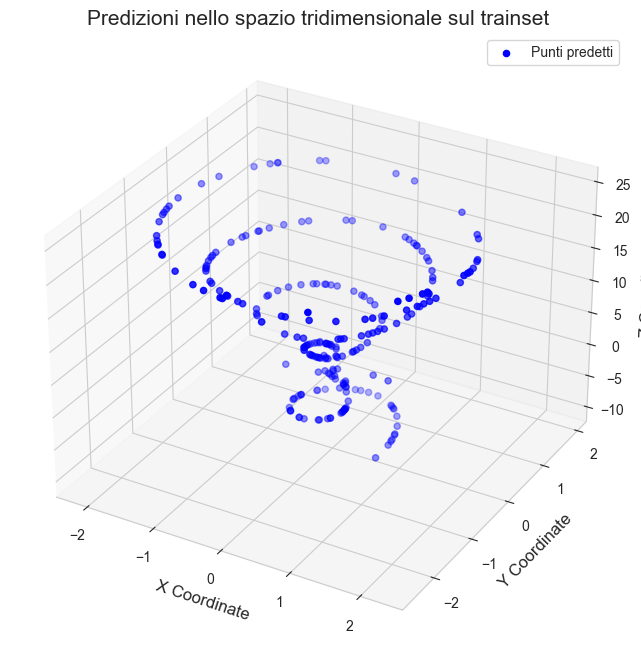

In [66]:
train_predictions_y1 = SVR_CUP_y1.predict(X_train)
train_predictions_y2 = SVR_CUP_y2.predict(X_train)
train_predictions_y3 = SVR_CUP_y3.predict(X_train)

x_coords = train_predictions_y1
y_coords = train_predictions_y2 
z_coords = train_predictions_y3

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, c='b', marker='o', label='Punti predetti')
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_zlabel('Z Coordinate', fontsize=12)
ax.set_title('Predizioni nello spazio tridimensionale sul trainset', fontsize=15)
ax.legend()

plt.show()

In [72]:
y_combined = np.stack([train_predictions_y1, train_predictions_y2, train_predictions_y3], axis=1)
mee(y_combined, y_train)

0.6542962667769585